In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

C:\Users\rw201\AppData\Local\Temp\ipykernel_14836\930725367.py:5: SADeprecationWarning: The AutomapBase.prepare.reflect parameter is deprecated and will be removed in a future release.  Reflection is enabled when AutomapBase.prepare.autoload_with is passed.
  Base.prepare(engine, reflect=True)


In [6]:
# View all of the classes that automap found
Base.classes.keys()

['station', 'measurement']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()

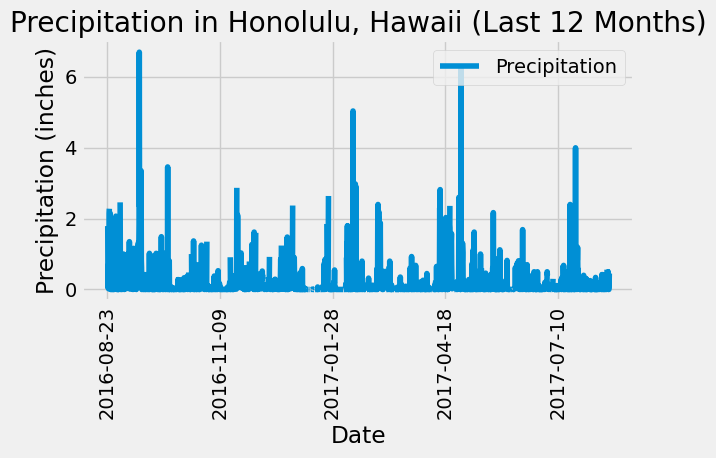

In [11]:
# Calculate the date one year from the last date in the dataset.
recent_date_value = dt.datetime.strptime(recent_date[0], '%Y-%m-%d').date()
one_year_ago = recent_date_value - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores.
precipitation_data = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= one_year_ago).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names.
precipitation_df = pd.DataFrame(precipitation_data, columns=['Date', 'Precipitation'])

# Sort the DataFrame by date.
precipitation_df = precipitation_df.sort_values('Date')

# Use Pandas Plotting with Matplotlib to plot the data.
precipitation_df.plot(x='Date', y='Precipitation', rot=90)
plt.xlabel('Date')
plt.ylabel('Precipitation (inches)')
plt.title('Precipitation in Honolulu, Hawaii (Last 12 Months)')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()


In [12]:
# Use Pandas to calculate the summary statistics for the precipitation data.
precipitation_stats = precipitation_df['Precipitation'].describe()
print(precipitation_stats)

count    2021.000000
mean        0.177279
std         0.461190
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: Precipitation, dtype: float64


# Exploratory Station Analysis

In [13]:
# Design a query to calculate the total number of stations in the dataset.
station_count = session.query(func.count(Station.station)).scalar()
print(f"Total number of stations: {station_count}")

Total number of stations: 9


In [14]:
# Design a query to find the most active stations and their counts in descending order.
active_stations = session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

for station, count in active_stations:
    print(f"Station: {station}, Count: {count}")


Station: USC00519281, Count: 2772
Station: USC00519397, Count: 2724
Station: USC00513117, Count: 2709
Station: USC00519523, Count: 2669
Station: USC00516128, Count: 2612
Station: USC00514830, Count: 2202
Station: USC00511918, Count: 1979
Station: USC00517948, Count: 1372
Station: USC00518838, Count: 511


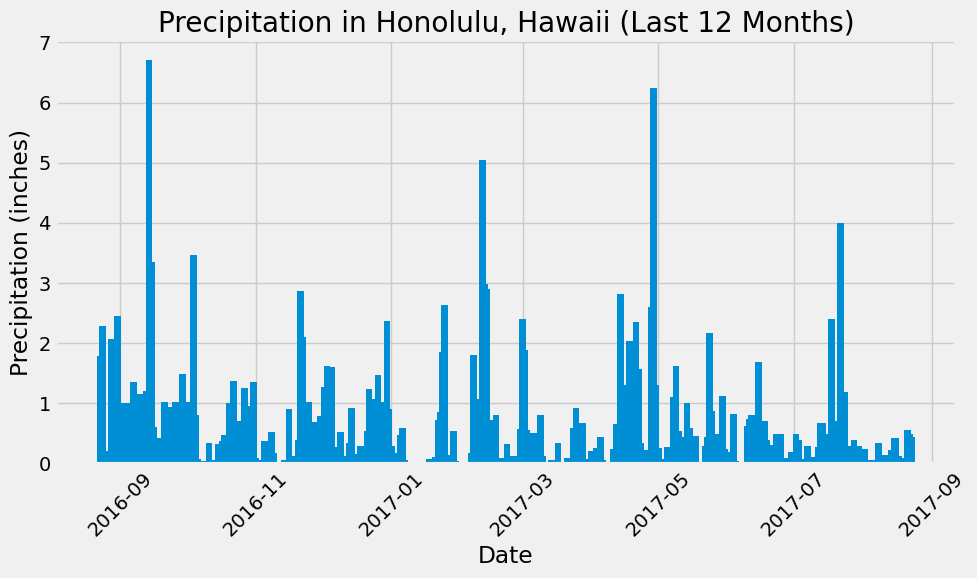

Summary Statistics for Precipitation Data:
count    2021.000000
mean        0.177279
std         0.461190
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: prcp, dtype: float64
Total number of stations: 9
Most active station: USC00519281
Temperature Stats for Most Active Station:
Min Temperature: 54
Max Temperature: 85
Avg Temperature: 71.66378066378067


In [20]:
# Load the dataset into Pandas DataFrame
measurements_df = pd.read_csv('resources/hawaii_measurements.csv')
stations_df = pd.read_csv('resources/hawaii_stations.csv')

# Precipitation Analysis
# Find the most recent date in the dataset
recent_date = measurements_df['date'].max()

# Load the dataset into Pandas DataFrame
measurements_df = pd.read_csv('resources/hawaii_measurements.csv')
stations_df = pd.read_csv('resources/hawaii_stations.csv')

# Convert the "date" column to datetime data type
measurements_df['date'] = pd.to_datetime(measurements_df['date'])

# Precipitation Analysis
# Find the most recent date in the dataset
recent_date = measurements_df['date'].max()

# Calculate the date one year ago from the most recent date
one_year_ago = recent_date - pd.DateOffset(years=1)

# Filter the measurements data for the last 12 months of data
precipitation_data = measurements_df.loc[measurements_df['date'] >= one_year_ago, ['date', 'prcp']]

# Sort the data by date
precipitation_data = precipitation_data.sort_values('date')

# Plot the precipitation data
plt.figure(figsize=(10, 6))
plt.bar(precipitation_data['date'], precipitation_data['prcp'], width=3)
plt.xlabel('Date')
plt.ylabel('Precipitation (inches)')
plt.title('Precipitation in Honolulu, Hawaii (Last 12 Months)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Print the summary statistics for precipitation data
print("Summary Statistics for Precipitation Data:")
print(precipitation_data['prcp'].describe())

# Station Analysis
# Calculate the total number of stations
station_count = len(stations_df)

print(f"Total number of stations: {station_count}")

# Find the most active station
most_active_station = measurements_df['station'].value_counts().idxmax()

print(f"Most active station: {most_active_station}")

# Calculate the lowest, highest, and average temperature for the most active station
active_station_data = measurements_df.loc[measurements_df['station'] == most_active_station, 'tobs']
min_temperature = active_station_data.min()
max_temperature = active_station_data.max()
avg_temperature = active_station_data.mean()

print("Temperature Stats for Most Active Station:")
print(f"Min Temperature: {min_temperature}")
print(f"Max Temperature: {max_temperature}")
print(f"Avg Temperature: {avg_temperature}")


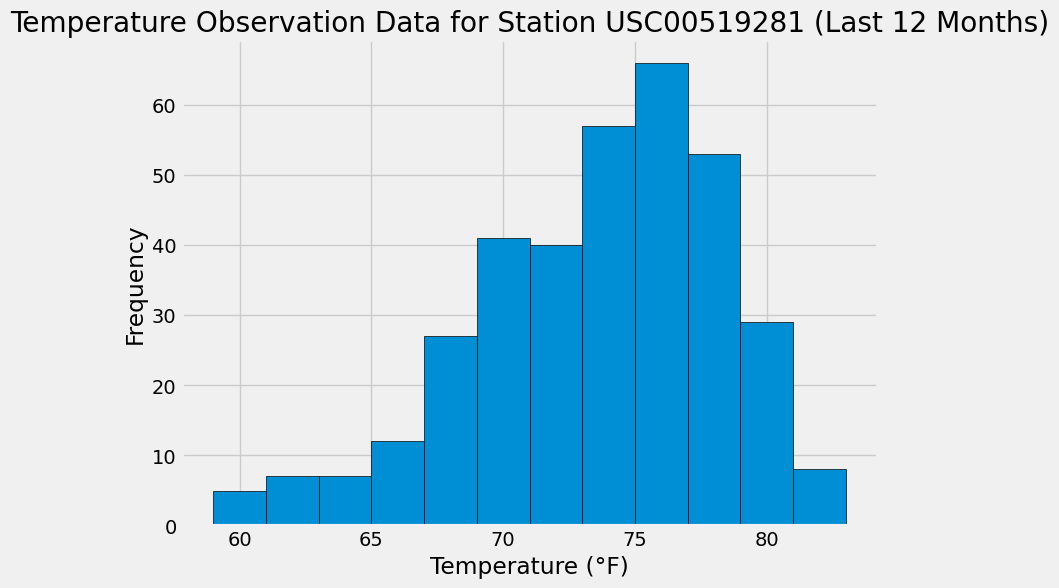

In [21]:
# Load the dataset into Pandas DataFrame
measurements_df = pd.read_csv('resources/hawaii_measurements.csv')
stations_df = pd.read_csv('resources/hawaii_stations.csv')

# Convert the "date" column to datetime data type
measurements_df['date'] = pd.to_datetime(measurements_df['date'])

# Find the most active station
most_active_station = measurements_df['station'].value_counts().idxmax()

# Filter the measurements data for the last 12 months of data for the most active station
one_year_ago = measurements_df['date'].max() - pd.DateOffset(years=1)
temperature_data = measurements_df.loc[(measurements_df['station'] == most_active_station) & (measurements_df['date'] >= one_year_ago), 'tobs']

# Plot the results as a histogram
plt.figure(figsize=(8, 6))
plt.hist(temperature_data, bins=12, edgecolor='black')
plt.xlabel('Temperature (°F)')
plt.ylabel('Frequency')
plt.title(f'Temperature Observation Data for Station {most_active_station} (Last 12 Months)')
plt.show()


# Close Session

In [22]:
# Close Session
session.close()